In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv('car data.csv')

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car.shape

(301, 9)

In [6]:
print(car['Seller_Type'].unique())
print(car['Fuel_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [7]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car[car.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [9]:
df = pd.DataFrame(car.iloc[:,1:])
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# here added a current year feature to know the age of car 

In [10]:
df['Current_year']= 2022
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


# Now calculated the age of car and created a new feature

In [11]:
df['years_no'] = df['Current_year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,years_no
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


# Here we dropped the other columns 

In [12]:
df.drop(['Year','Current_year'],axis = 1,inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_no
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [13]:
df_new = pd.get_dummies(df,drop_first= True)
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_no,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [14]:
df_new.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_no,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
years_no,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


# So here we are just checking if our data is correlated or not, and if it is correlated we can apply PCA or feature selection technique

In [15]:
import seaborn as sns

<AxesSubplot:>

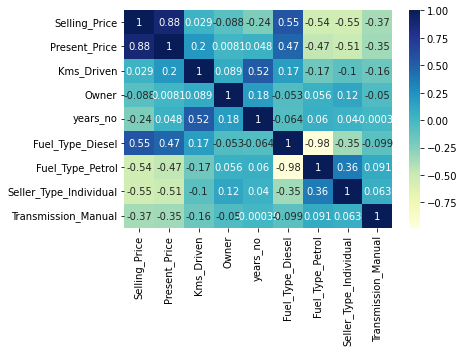

In [16]:
sns.heatmap(df_new.corr(),annot=True,cmap="YlGnBu")

# after checking correlation lets apply train test and split but first we have to assign x and y values

# Here target / dependent feature is selling price and independent features are other features

In [17]:
x = df_new.iloc[:,1:]
y = df_new.iloc[:,0]

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(x,y)

ExtraTreesRegressor()

In [19]:
print(reg.feature_importances_)

[0.36011162 0.0390303  0.00049266 0.07774794 0.23766011 0.00504256
 0.1356054  0.14430941]


C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

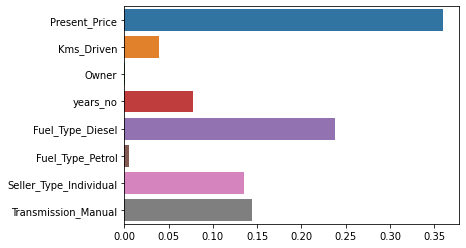

In [20]:
sns.barplot(reg.feature_importances_,x.columns)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

In [23]:
x_train.shape

(240, 8)

In [24]:
x_test.shape

(61, 8)

In [26]:
n_estimators = [int(x) for x in np.linspace(100,1200,15)] 
print(n_estimators,end = '')

[100, 178, 257, 335, 414, 492, 571, 650, 728, 807, 885, 964, 1042, 1121, 1200]

In [27]:
max_depth= [int(x) for x in np.linspace(5,30,6)]
min_samples_split=[12,22,32,69,100]
min_samples_leaf=[2,4,6,8,10]
#max_features = ['auto','sqrt']

In [28]:
random_grid = {'n_estimators': n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 178, 257, 335, 414, 492, 571, 650, 728, 807, 885, 964, 1042, 1121, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [12, 22, 32, 69, 100], 'min_samples_leaf': [2, 4, 6, 8, 10]}


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf_reg = RandomForestRegressor() 

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# we are using hyper parameter technique to find best suited values which will give us better accuracy

In [32]:
rmscv = RandomizedSearchCV(estimator=rf_reg,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter= 10,cv = 5,verbose= 2,random_state = 4)

In [36]:
%%time
rmscv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=22, n_estimators=571; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=22, n_estimators=571; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=22, n_estimators=571; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=22, n_estimators=571; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=22, n_estimators=571; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=22, n_estimators=807; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=22, n_estimators=807; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=22, n_estimators=807; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=22, n_estimators=807; total time=   0.4s
[CV] END max_depth=5, min

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [12, 22, 32, 69,
                                                              100],
                                        'n_estimators': [100, 178, 257, 335,
                                                         414, 492, 571, 650,
                                                         728, 807, 885, 964,
                                                         1042, 1121, 1200]},
                   random_state=4, scoring='neg_mean_squared_error', verbose=2)

In [37]:
pred = rmscv.predict(x_test)

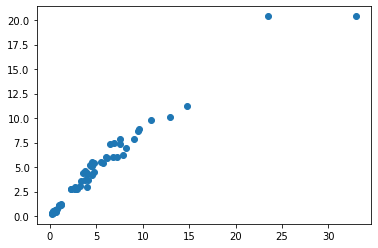

In [38]:
# After seeing the scatter plot the observation is our prediction is plotted in line itself it means that our model prediction is good
plt.scatter(y_test,pred)

In [39]:
# finding the mse between predicted and original points
from sklearn.metrics import mean_squared_error
err = mean_squared_error(y_test,pred)
err

3.3971199160970884

In [52]:
x_test

,Present_Price,Kms_Driven,Owner,years_no,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
294,6.80,33019,0,8,0,1,0,1
208,8.10,3435,0,5,0,1,0,1
18,5.09,35500,0,7,0,0,0,1
43,8.06,45780,0,8,1,0,0,1
241,7.13,35866,1,7,0,1,0,1
...,...,...,...,...,...,...,...,...
246,6.79,35000,0,10,0,1,0,1
156,0.52,15000,0,5,0,1,1,1
11,10.38,51000,0,7,1,0,0,1
64,36.23,6000,0,5,1,0,0,0


In [56]:
!pip install xgboost